In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

import warnings

warnings.filterwarnings('ignore')

target_names = ['Class-0', 'Class-1', 'Class-2']

In [2]:
df = pd.read_csv('../processeddata/new_airlines_normalized.csv')
df.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Time.Month.level,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,0.301513,0.270412,0.350472,0.189474,...,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628,0.253219,3.0,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,0.088067,0.093018,0.069295,0.042105,...,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041,0.053621,3.0,0.816993,1.0


In [3]:
col = ['# of Delays.Carrier',
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted',# 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

In [4]:
normalizedData = df[col]
normalizedData.shape

(4408, 15)

In [5]:
X = normalizedData.iloc[ :, :-1]
print(X.shape)
X.head()

(4408, 14)


,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Flights.Cancelled,Flights.Delayed,Flights.Diverted,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total
0,0.301513,0.270412,0.350472,0.189474,0.403206,0.057928,0.414431,0.061086,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628
1,0.088067,0.093018,0.069295,0.042105,0.080148,0.036715,0.099881,0.006787,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041
2,0.061849,0.088924,0.036424,0.094737,0.094945,0.007071,0.071705,0.033937,0.161140,0.035474,0.063728,0.025609,0.056173,0.051023
3,0.063193,0.087787,0.074847,0.031579,0.065351,0.019037,0.095334,0.031674,0.171866,0.040725,0.053647,0.036017,0.025662,0.052444
4,0.057479,0.041392,0.047307,0.052632,0.070284,0.019309,0.060897,0.040724,0.111460,0.036125,0.025243,0.031345,0.024247,0.038985


In [6]:
y = df.iloc[ :, -1:]
y.head()

,Ratio_Rank
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0


In [7]:
X = X.to_numpy()
print(type(X))

y = y.to_numpy()
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


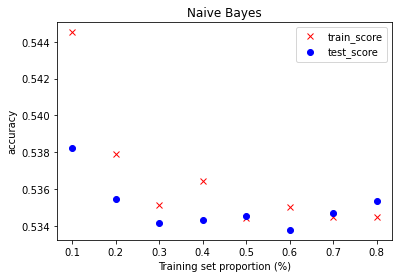

In [8]:
nbclf = GaussianNB()

t = [x/10 for x in range(1, 9)]

plt.figure()

for s in t:
    #print(s)

    train_score = []
    test_score = []
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        nbclf.fit(X_train, y_train)
        train_score.append(nbclf.score(X_train, y_train))
        test_score.append(nbclf.score(X_test, y_test))
    plt.plot(s, np.mean(train_score), 'rx')
    plt.plot(s, np.mean(test_score), 'bo')
    plt.legend(['train_score', 'test_score'], loc='best')
    plt.title("Naive Bayes") 

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [10]:
nbclf = GaussianNB().fit(X_train, y_train)

kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into k folds 


c0_precisions = []
c0_recalls = []
c1_precisions = []
c1_recalls = []
accTotal = 0
n = 1
for train_index, test_index in kf.split(X):

    print("=========================Kfold" , n , "=======================")

    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    nbclf.fit(X_train, y_train)
    y_pred = nbclf.predict(X_test)

    print(confusion_matrix(y_test, y_pred))

    # Get a dictionary of performance results and access the results
    results = classification_report(y_test, y_pred, target_names=target_names)
    print(results)


    metrics_dict = classification_report(y_test, y_pred, 
                        target_names=target_names, output_dict=True)

    #print(metrics_dict)

    print('precision (weighted):', metrics_dict['weighted avg']['precision'])
    print('recall avg (weighted):', metrics_dict['weighted avg']['recall'])
    accTotal = accTotal + metrics_dict['accuracy']
    print('accuracy: ', metrics_dict['accuracy'])

    n = n + 1
#print(accTotal/KFoldNum)
print('Accuracy of classifier: {:.2f}'.format((accTotal/10)))

=========================Kfold 1 =======================
[[144  17  10]
 [127  53  29]
 [ 11  26  24]]
              precision    recall  f1-score   support

     Class-0       0.51      0.84      0.64       171
     Class-1       0.55      0.25      0.35       209
     Class-2       0.38      0.39      0.39        61

    accuracy                           0.50       441
   macro avg       0.48      0.50      0.46       441
weighted avg       0.51      0.50      0.46       441

precision (weighted): 0.5123416345599368
recall avg (weighted): 0.5011337868480725
accuracy:  0.5011337868480725
=========================Kfold 2 =======================
[[161  14  14]
 [102  49  33]
 [ 13  32  23]]
              precision    recall  f1-score   support

     Class-0       0.58      0.85      0.69       189
     Class-1       0.52      0.27      0.35       184
     Class-2       0.33      0.34      0.33        68

    accuracy                           0.53       441
   macro avg       0.48     